In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

import mall_wrangle
from mall_wrangle import wrangle_mall_df

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [4]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [9]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [10]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.00
versicolor,5.936,2.770,4.260,1.326,0.48
virginica,6.588,2.974,5.552,2.026,1.40


[Text(0.5, 1.0, 'K-Means Clusters')]

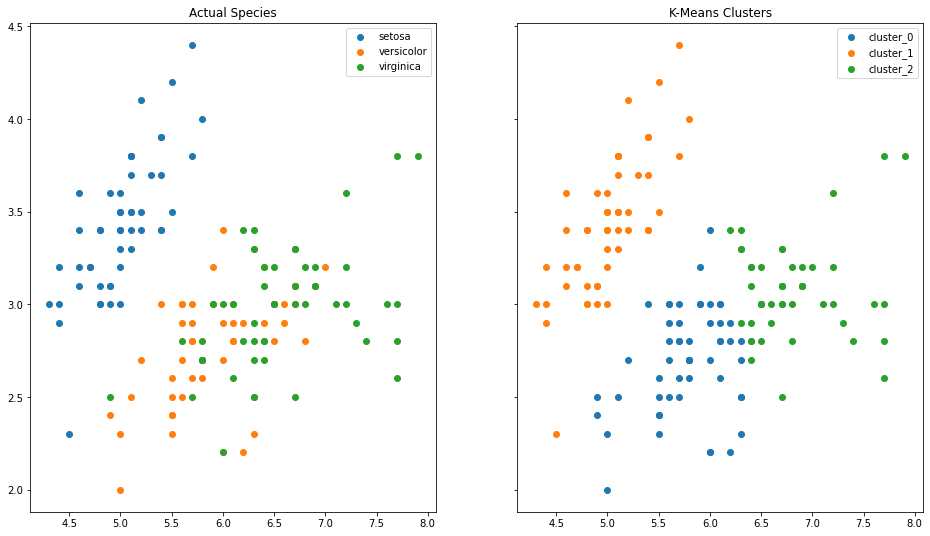

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.sepal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].sepal_length, df[df.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

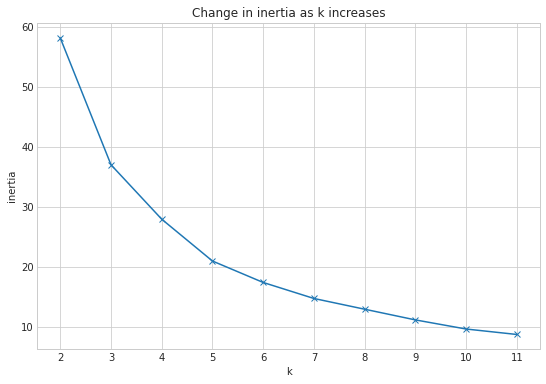

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
Y = df[['petal_length', 'sepal_width']]
Y.head()

,petal_length,sepal_width
1,1.4,3.5
2,1.4,3.0
3,1.3,3.2
4,1.5,3.1
5,1.4,3.6


In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters2 = kmeans.predict(X)
clusters2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [15]:
df['cluster2'] = clusters2
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster2
1,5.1,3.5,1.4,0.2,setosa,1,0
2,4.9,3.0,1.4,0.2,setosa,1,0
3,4.7,3.2,1.3,0.2,setosa,1,0
4,4.6,3.1,1.5,0.2,setosa,1,0
5,5.0,3.6,1.4,0.2,setosa,1,0


[Text(0.5, 1.0, 'K-Means Clusters')]

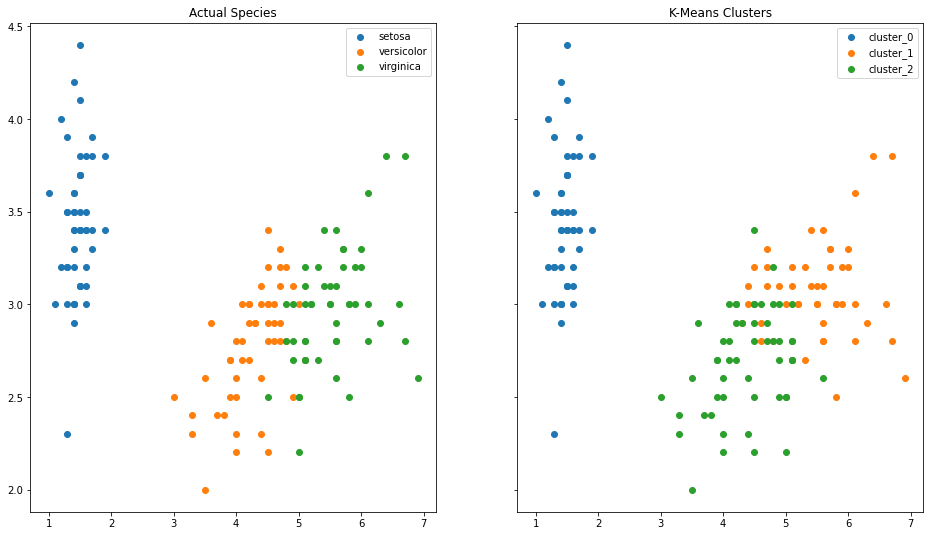

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster2 == cluster_n].petal_length, df[df.cluster2 == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

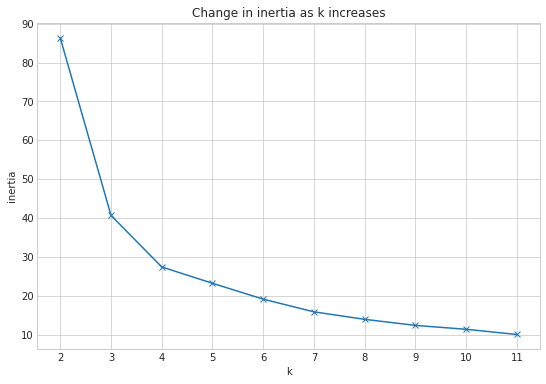

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Y).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Repeat the clustering, this time with 3 different features.

In [20]:
Z = df[['petal_length', 'sepal_length', 'sepal_width' ]]
Z.head()

,petal_length,sepal_length,sepal_width
1,1.4,5.1,3.5
2,1.4,4.9,3.0
3,1.3,4.7,3.2
4,1.5,4.6,3.1
5,1.4,5.0,3.6


In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters3 = kmeans.predict(X)
clusters3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [22]:
df['three_feature_cluster'] = clusters3
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster2,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,1,0,0
2,4.9,3.0,1.4,0.2,setosa,1,0,0
3,4.7,3.2,1.3,0.2,setosa,1,0,0
4,4.6,3.1,1.5,0.2,setosa,1,0,0
5,5.0,3.6,1.4,0.2,setosa,1,0,0


In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [37]:
df = wrangle_mall.wrangle_mall_df()

NameError: name 'wrangle_mall' is not defined